# IMEC2001 Herramientas Computacionales
## Semana 7: Ecuaciones Diferenciales Ordinarias (ODE)
### Clase 13:  Incertidumbre y Propagación de Error

Universidad de los Andes — Mayo 17, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Incertidumbre y Propagación de Error [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Distribución Normal: Valor de $Z$
- 1.3. Distribución t-Student: Valor de $t$
- 1.4. Propagación de Error con Librería `uncertainties`
    - 1.4.1. Ejemplo 1: Potencia Eléctrica
    - 1.4.2. Ejemplo 2: Péndulo Simple
        - 1.4.2.1. Propagación de Error: Manual
        - 1.4.2.2. Propagación de Error: `uncertainties`
- 1.5. Barras de Error con `plt.errorbar`
___

<a id="section1"></a>
# Sección 1: Incertidumbre y Propagación de Error

## 1.1. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  !pip install uncertainties
  ```

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy

# Incertidumbre
from scipy import stats
from uncertainties import ufloat

## 1.2. Distribución Normal: Valor de $Z$

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.stats.norm` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).
</div>

In [2]:
# PASO 1. Intervalo de confianza
IC = 0.95
IC

0.95

In [3]:
# PASO 2. Valor de alpha
alpha = 1 - IC
alpha

0.050000000000000044

In [4]:
# PASO 3. Valor de alpha/2
alpha_medios = alpha/2
alpha_medios

0.025000000000000022

In [5]:
# PASO 4. Distr. Normal (Z)
valor = IC + alpha_medios

Z = stats.norm.ppf(valor)
Z

1.959963984540054

## 1.3. Distribución t-Student: Valor de $t$

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.stats.t` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).
</div>

In [6]:
# PASO 1. Intervalo de confianza
IC = 0.95
IC

0.95

In [7]:
# PASO 2. Valor de alpha
alpha = 1 - IC
alpha

0.050000000000000044

In [8]:
# PASO 3. Valor de alpha/2
alpha_medios = alpha/2
alpha_medios

0.025000000000000022

In [9]:
# PASO 4. Número de datos (asumamos que tomamos n=4 datos)
n = 4
n

4

In [10]:
# PASO 5. Grados de libertad (DOF)
v = n - 1
v

3

In [11]:
# PASO 4. Distr. t-Student (t)
valor = IC + alpha_medios

t = stats.t.ppf(valor, v)
t

3.182446305284263

## 1.4. Propagación de Error con Librería `uncertainties`

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `uncertainties` dando clic [aquí](https://uncertainties-python-package.readthedocs.io/en/latest/user_guide.html).
</div>

### 1.4.1. Ejemplo 1: Potencia Eléctrica

In [12]:
from uncertainties import ufloat

In [13]:
V = ufloat(5, 0.1) # Medida ± Incertidumbre
V

5.0+/-0.1

In [14]:
I = ufloat(10e-03, 0.01e-03) # Medida ± Incertidumbre
I

0.01+/-1e-05

In [15]:
P = V * I
P

0.05+/-0.0010012492197250392

### 1.4.2. Ejemplo 2: Péndulo Simple

Un péndulo simple se describe a partir de la siguiente ecuación:

$$
T = 2\pi \sqrt{\frac{L}{g}}
$$

Al despejar para la gravedad $g$, obtenemos:

$$
g = \frac{4 \pi^2 L}{T^2}
$$

Ahora, el error propagado para esta ecuación es:

$$
e = \sqrt{ \left( \frac{\partial g}{\partial L} \right)^2 \cdot U_L^2 + \left( \frac{\partial g}{\partial T} \right)^2 \cdot U_T^2}
$$

Luego:

$$
e = \sqrt{ \left( \frac{4 \pi^2}{T^2} \right)^2 \cdot U_L^2 + \left( \frac{-8 \pi^2 L}{T^3} \right)^2 \cdot U_T^2}
$$

#### 1.4.2.1. Propagación de Error: Manual

In [16]:
## TÉRMINO 1
### (∂g / ∂L)**2
dg_dL = (4*np.pi**2 / (1.942)**2)

### U_L**2
U_L = 1e-3

### (∂g / ∂L)**2 · U_L**2
termino1 = (dg_dL**2) * (U_L**2)
termino1

0.00010957779856545593

In [17]:
## TÉRMINO 2
### (∂g / ∂T)**2
dg_dT = (-8*np.pi**2*(0.936) / (1.942)**3)

### U_L**2
U_T = 4e-3

### (∂g / ∂T)**2 · U_T**2
termino2 = (dg_dT**2) * (U_T**2)
termino2

0.0016291301886447737

In [18]:
# Propagación de Error
U_g = np.sqrt([termino1 + termino2])
U_g

array([0.04169782])

#### 1.4.2.2. Propagación de Error: `uncertainties`

In [19]:
## PASO 1. Definimos la variable longitud (L) con su error
L = ufloat(0.936, 1e-3)
L

0.936+/-0.001

In [20]:
## PASO 2. Definimos la variable periodo (T) con su error
T = ufloat(1.942, 4e-3)
T

1.942+/-0.004

In [21]:
## PASO 3. Ecuación de gravedad (g)
g = 4*np.pi**2*L / T**2
g

9.797993213510697+/-0.04169781753533667

## 1.5. Derivadas Parciales con `sympy.diff`

Tomando el ejercicio del péndulo simple:

> Un péndulo simple se describe a partir de la siguiente ecuación:
> $$
  T = 2\pi \sqrt{\frac{L}{g}}
> $$
> Al despejar para la gravedad $g$, obtenemos:
> $$
  g = \frac{4 \pi^2 L}{T^2}
> $$
> Ahora, el error propagado para esta ecuación es:
> $$
  e = \sqrt{ \left( \frac{\partial g}{\partial L} \right)^2 \cdot U_L^2 + \left( \frac{\partial g}{\partial T} \right)^2 \cdot U_T^2}
> $$
> Luego:
> $$
  e = \sqrt{ \left( \frac{4 \pi^2}{T^2} \right)^2 \cdot U_L^2 + \left( \frac{-8 \pi^2 L}{T^3} \right)^2 \cdot U_T^2}
> $$

Estas derivadas parciales las podemos hacer con la librería `sympy.diff`.

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.diff` dando clic [aquí](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html).
</div>

In [22]:
g, L, T = sympy.symbols('g, L, T', real=True)

In [23]:
g = (4 * sympy.pi * L) / T**2
g

4*pi*L/T**2

In [24]:
# ∂g / ∂T
dg_dL = sympy.diff(g, L) # sympy.diff(<función>, <variable a derivar parcialmente>)
dg_dL

4*pi/T**2

In [25]:
# ∂g / ∂L
dg_dT = sympy.diff(g, T) # sympy.diff(<función>, <variable a derivar parcialmente>)
dg_dT

-8*pi*L/T**3

## 1.5. Barras de Error con `plt.errorbar`

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `matplotlib.pyplot.plt.errorbar` dando clic [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).
</div>

In [26]:
file_name = './data/engines.xlsx' # ./ es pwd()
sheet = 'Data'

df = pd.read_excel(io=file_name, sheet_name=sheet)
df.head()

,Index,Engine,Mass (Kg),Number of Cylinders,Strokes per Cycle,Displacement (cm3),Bore (mm),Stroke (mm),Maximum Brake Horsepower (BHP),Revolutions per Minute (RPM)
0,1,Webra Speedy,0.135,1,2,1.8,13.5,12.5,0.45,22000
1,2,Motori Cipolla,0.150,1,2,2.5,15.0,14.0,1.00,26000
2,3,Webra Speed 20,0.250,1,2,3.4,16.5,16.0,0.78,22000
3,4,Webra 40,0.270,1,2,6.5,21.0,19.0,0.96,15500
4,5,Webra 61 Blackhead,0.430,1,2,10.0,24.0,22.0,1.55,14000


In [27]:
# Incertidumbre Eje Y
Uy = abs(np.random.normal(loc=0.0, scale=1.0, size=len(df)))
Uy

array([0.26268305, 0.53546082, 0.04050604, 0.14160265, 0.81834281,
       0.71831115, 1.16954681, 0.62163799, 1.14101424, 0.62433371,
       0.21058976, 2.11691275, 0.85000513, 1.43932101, 0.78765359,
       0.26081857, 0.76048822, 1.12064681, 1.64846176, 1.24661804,
       1.16242835, 2.84761849, 1.07999338, 1.03081958, 0.53143124,
       0.64071638, 0.95668416, 0.31365827, 0.98530579, 0.59319567,
       0.32134573, 0.86046511, 0.0281361 , 1.17499642, 0.88453108,
       0.79196819, 0.32562914, 0.19797995, 0.44234542])

In [28]:
# Incertidumbre Eje X
Ux = abs(np.random.normal(loc=0.0, scale=0.3, size=len(df)))
Ux

array([0.25936688, 0.17163901, 0.09406546, 0.21697835, 0.41486581,
       0.57308145, 0.1803118 , 0.19034725, 0.23330666, 0.13167094,
       0.26655894, 0.01735944, 0.10255206, 0.58922391, 0.09649059,
       0.21778978, 0.218362  , 0.39192447, 0.47630362, 0.10523635,
       0.13037813, 0.53812971, 0.53652646, 0.57027923, 0.4690534 ,
       0.31731284, 0.26383721, 0.1439259 , 0.36958727, 0.19353519,
       0.06385466, 0.05317351, 0.10363169, 0.03214357, 0.25787177,
       0.43794092, 0.22976988, 0.14749063, 0.03447197])

In [29]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc=True)
    
    plt.tight_layout;

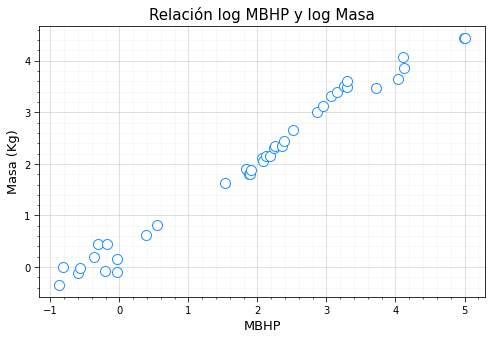

In [30]:
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver))

x = np.log10(df['Mass (Kg)'].values)
y = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

plt.plot(x, y, linestyle='', marker='o', markerfacecolor='white', markeredgecolor='dodgerblue', ms=10)

formato_grafica(titulo='Relación log MBHP y log Masa', 
                ejex='MBHP', 
                ejey='Masa (Kg)',
                leyenda=False)

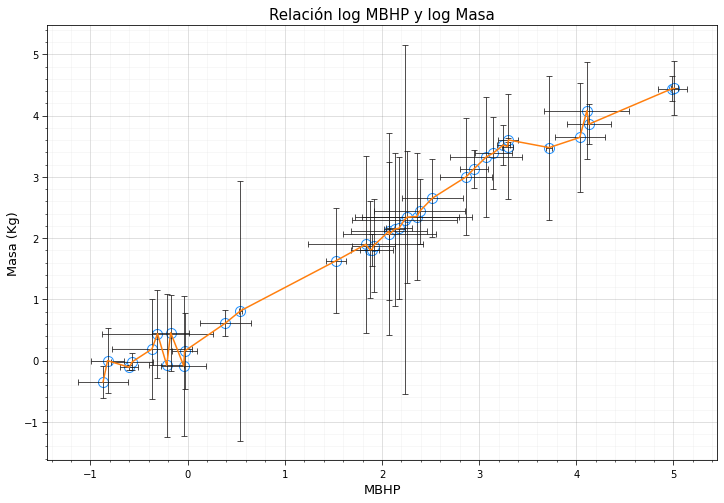

In [31]:
hor = 12
ver = 8
fig2 = plt.figure(figsize=(hor, ver))

x = np.log10(df['Mass (Kg)'].values)
y = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

plt.plot(x, y, linestyle='', marker='o', markerfacecolor='white', markeredgecolor='dodgerblue', ms=10)

plt.errorbar(x=x, # Valor de X
             y=y, # Valor de Y
             yerr=Uy, # Incertidumbre en Y
             xerr=Ux, # Incertidumbre en X
             ecolor='#191717', # Color barras de error
             elinewidth=0.75, # Ancho barras de error
             capsize=3, # Longitud límites barras de error
             capthick=0.75) # Ancho límites barras de error

formato_grafica(titulo='Relación log MBHP y log Masa',
                ejex='MBHP',
                ejey='Masa (Kg)',
                leyenda=False)